## 

## 文档内容

1. 前言和目录
2. Python基础
3. 数据读取
4. Python的数学基础：numpy
5. 数据清洗/数据处理：pandas
6. 连续数学：scipy
7. [符号/符号计算：sympy](#七、符号/符号计算：sympy)
8. [绘图：matplotlib & seaborn](#八、绘图：matplotlib&seaborn)

上面的超链接提供一键直达

## 其他

文档同步开源到Github：
https://github.com/hail-linda/Scientific-computing-2-hours-in-Python

 对于后半部分的这些外部模块，将不再进行细致的函数描述和讲解。但是会引入一些别人写的比较好的教程，同时配合一些解释和例子。

## 七、符号/符号计算：sympy

https://zhuanlan.zhihu.com/p/83822118
    
https://geek-docs.com/python/python-tutorial/python-sympy.html

https://blog.csdn.net/cj151525/article/details/95756847

Python-sympy科学计算与数据处理.pdf

下面的例子中有一些输出直接就是公式，这也是sympy的一项好处，在这些公式上右键`shoe Math as -> Tex Command`，就能得到Latex格式的公式，直接拿来渲染就好用（但可能形式上有一些复杂），比如:

\displaystyle x \left(x^{2} y^{2} \cos{\left(x y \right)} + 6 x y \sin{\left(x y \right)} - 6 \cos{\left(x y \right)}\right)

就是下面例子中“微分”的第四项

In [45]:
import sympy

**多项式求解**

In [46]:
x=sympy.Symbol('x')
fx=5*x+4
#使用evalf函数传值
y1=fx.evalf(subs={x:6})
print(y1)

34.0000000000000


**多元多项式求解**

In [47]:
#多元表达式
x=sympy.Symbol('x')
y=sympy.Symbol('y')
fx=x*x+y*y
result=fx.evalf(subs={x:3,y:4})
print(result)

25.0000000000000


**求和**

In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'# 这两行是为了输出两个OUT[*]

import sympy
#定义变量
n=sympy.Symbol('n')
f=n**2+3*n
#前面参数放函数，后面放变量的变化范围
sympy.summation(f,(n,1,10))
f

550

n**2 + 3*n

**微分**

In [49]:

sympy.diff(sympy.sin(2*x), x) 
sympy.sin(2*x).diff(x) 
sympy.diff(sympy.sin(2*x), x, 2) 
sympy.diff(sympy.sin(x*y), x,2,y,3) 

2*cos(2*x)

2*cos(2*x)

-4*sin(2*x)

x*(x**2*y**2*cos(x*y) + 6*x*y*sin(x*y) - 6*cos(x*y))

**积分**

In [50]:
f = x**2 + 1
sympy.integrate(f)#不定积分
sympy.integrate(f, (x, -1, 1))#定积分


x**3/3 + x

8/3

**公式化简**

In [51]:
from sympy.abc import a, b
expr = b*a + -4*a + b + a*b + 4*a + (a + b)*3 + (a**2 + 4*b)**3
expr # 表达式（会自动合并同类项）
sympy.expand(expr) # 展开
sympy.simplify(sympy.sin(a)/sympy.cos(a))# 化简

2*a*b + 3*a + 4*b + (a**2 + 4*b)**3

a**6 + 12*a**4*b + 48*a**2*b**2 + 2*a*b + 3*a + 64*b**3 + 4*b

tan(a)

**求值**

In [52]:
expr
expr.subs([(a,3),(b,4)])

2*a*b + 3*a + 4*b + (a**2 + 4*b)**3

15674

## 八、绘图：matplotlib&seaborn

可能这份教程最快乐的部分就是画图了，毕竟他是真的跟写代码关系不是很大，所有的代码都是用来调参的，而不是用来计算的，matplotlib是一份大众比较喜闻乐见的绘图库，可能是在Python中用来绘制二维图形最好用的一个东西了，比如我们先随便来画一个散点图。

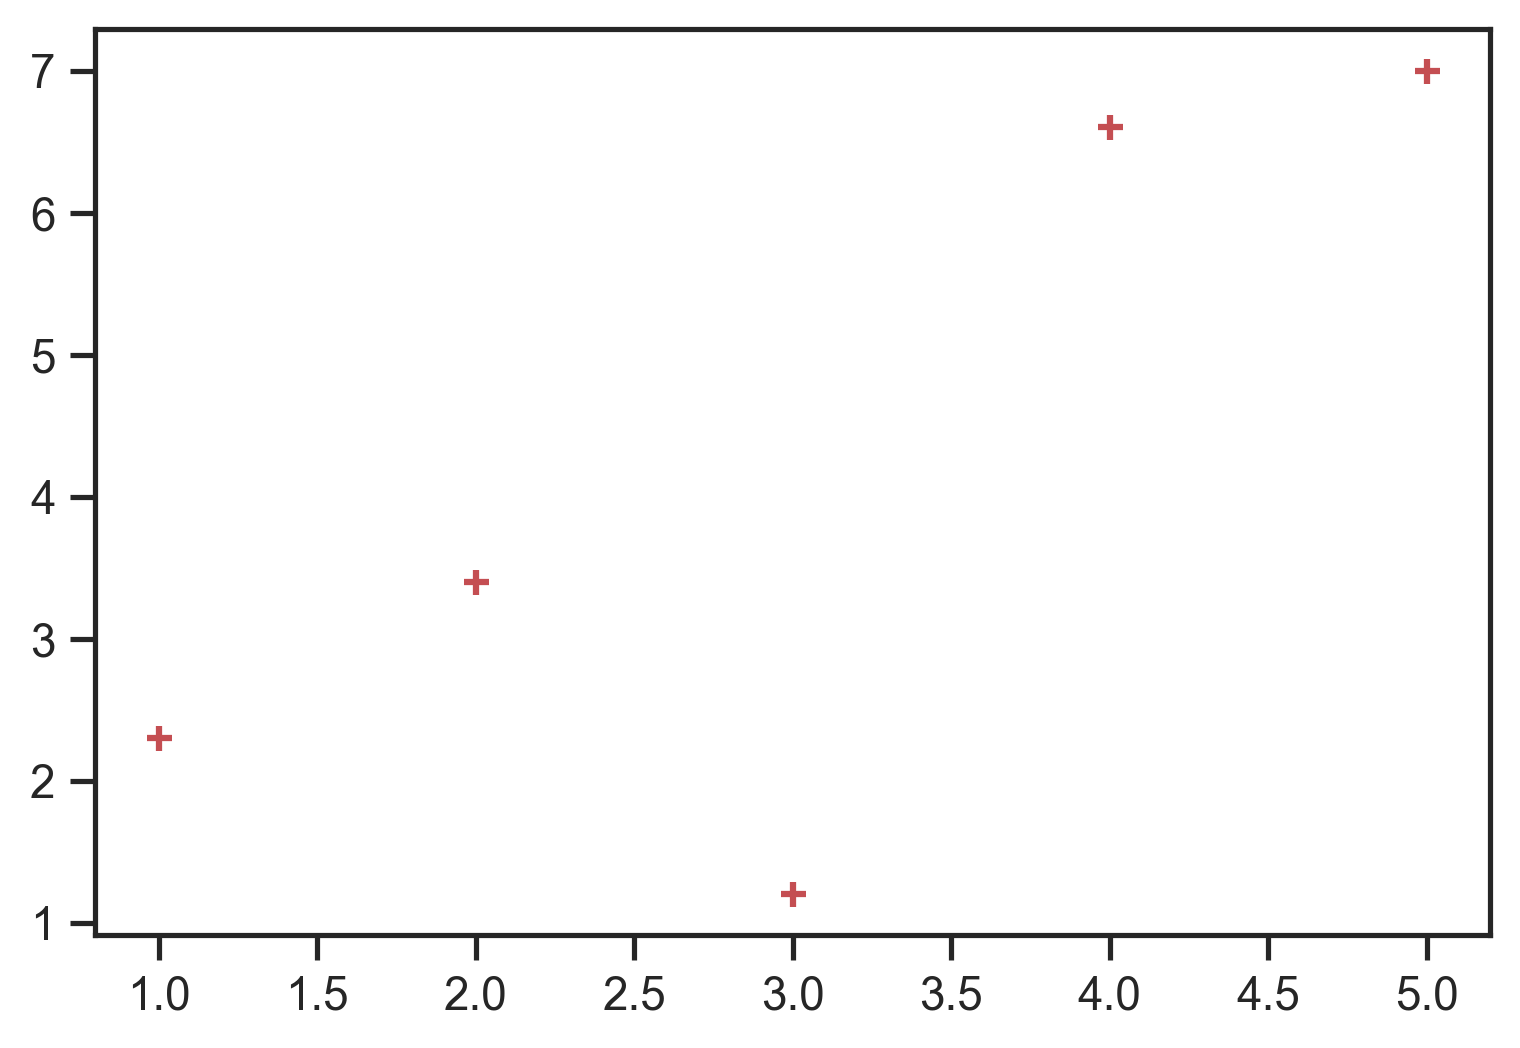

In [53]:
# 3、使用 matplotlib 的 scatter 方法绘制散点图
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [2.3, 3.4, 1.2, 6.6, 7.0]
plt.scatter(x, y, color='r', marker='+')

好的，你学会了吗？这就是我们这一部分的全部内容了（笑

或者你想画一份正常的折线图，当然是从你的数据而得来的，这里我们用一些规律生成的数据加上噪声。

比如下面画出来的这幅图，就是两个不同相位同频率的正弦曲线，加上一些随机噪声所绘制出来的图形。

这一部分是对 https://www.runoob.com/w3cnote/matplotlib-tutorial.html 的复现和解释

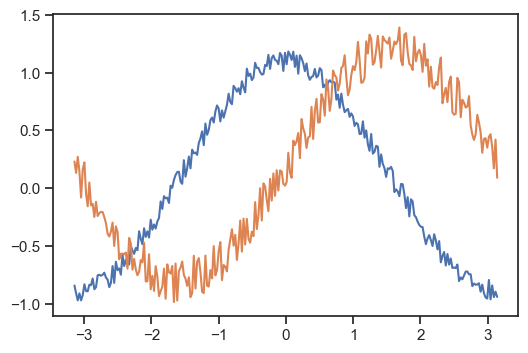

In [54]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)
 
C = C + np.random.rand(256)*0.2
S = S + np.random.rand(256)*0.4
plt.rcParams['figure.dpi'] = 100

plt.plot(X,C)
plt.plot(X,S)

plt.show()

那这里我们可以看到这是一份从$-\pi$到$\pi$线性分割出256份的一段信号，接下来的一些样例，我将在这个基础上去做一些改进，得到我们要的结果。

我们是不是可以改变图形的线型和颜色呢？

In [55]:
help(plt.plot)
# 提示：使用help(plt.plot)以查看帮助文档，这非常有用

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

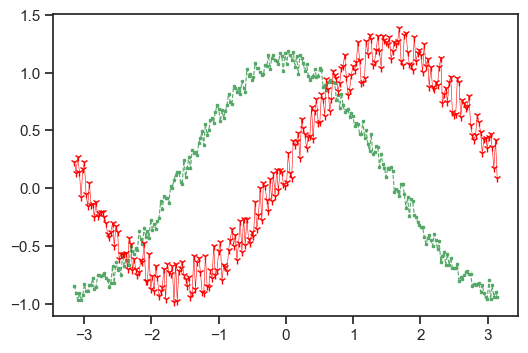

In [56]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2)
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-")

plt.show()

或者我们可以在他的基础上改变坐标轴大小和画布的尺寸

(-4.39822971502571, 4.39822971502571)

(-1.4033410027096196, 1.615476676401783)

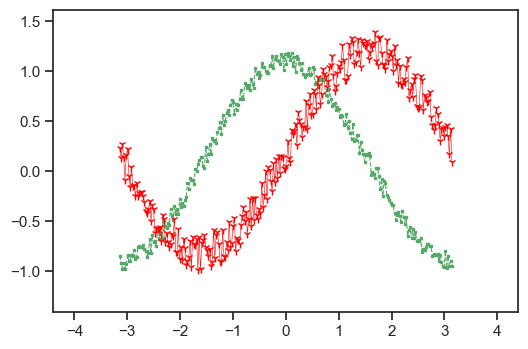

In [57]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2)
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-")

Y = C

# 太拥挤了不好看，要不要添加一圈空白？
xmin ,xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()

dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2

plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

plt.show()

或者现有的坐标刻度比较大众化，我们想要让它更符合我们的要求,是更符合我们的意思。

(-4.39822971502571, 4.39822971502571)

(-1.4033410027096196, 1.615476676401783)

([<matplotlib.axis.XTick at 0x24e62605520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x24e62605d90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

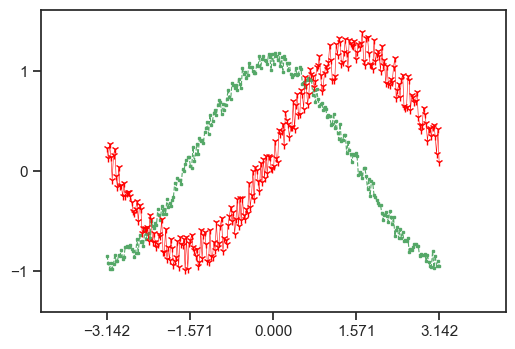

In [58]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2)
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-")

# 坐标轴范围
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

#
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.show()

用3.14描述$\pi$还是不够准确，我们是否可以把它直接换成符号呢？

(-4.39822971502571, 4.39822971502571)

(-1.4033410027096196, 1.615476676401783)

([<matplotlib.axis.XTick at 0x24e626dc430>,
 [Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-1.5707963267948966, 0, '$-\\pi/2$'),
  Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$+\\pi/2$'),
  Text(3.141592653589793, 0, '$+\\pi$')])

([<matplotlib.axis.YTick at 0x24e626dccd0>,
 [Text(0, -1, '$-1$'), Text(0, 0, '$0$'), Text(0, 1, '$+1$')])

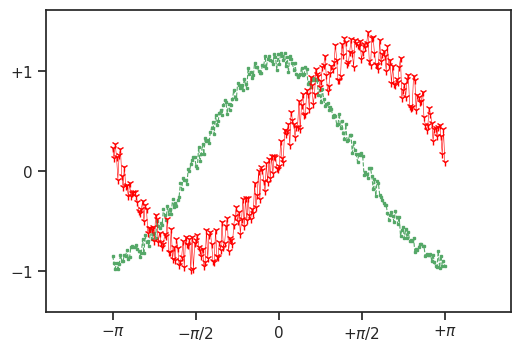

In [59]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2)
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-")

# 坐标轴范围
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

#有哪些坐标轴的刻度以及这些位置上会显示些什么
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$'])

plt.show()

我们是不是可以把坐标轴移动到中央？为了方便观察，我给图像增加了50%透明度

(-4.39822971502571, 4.39822971502571)

(-1.4033410027096196, 1.615476676401783)

([<matplotlib.axis.XTick at 0x24e5edf03d0>,
 [Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-1.5707963267948966, 0, '$-\\pi/2$'),
  Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$+\\pi/2$'),
  Text(3.141592653589793, 0, '$+\\pi$')])

([<matplotlib.axis.YTick at 0x24e5edf0a00>,
 [Text(0, -1, '$-1$'), Text(0, 0, '$0$'), Text(0, 1, '$+1$')])

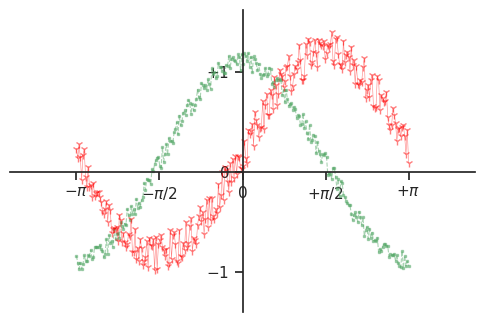

In [60]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2,alpha =0.5)
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-",alpha =0.5)

# 坐标轴范围
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

#有哪些坐标轴的刻度以及这些位置上会显示些什么
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$'])

#移动坐标轴
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

为他们增加图例。

(-4.39822971502571, 4.39822971502571)

(-1.4033410027096196, 1.615476676401783)

([<matplotlib.axis.XTick at 0x24e5ee8b5e0>,
 [Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-1.5707963267948966, 0, '$-\\pi/2$'),
  Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$+\\pi/2$'),
  Text(3.141592653589793, 0, '$+\\pi$')])

([<matplotlib.axis.YTick at 0x24e5ee8b0a0>,
 [Text(0, -1, '$-1$'), Text(0, 0, '$0$'), Text(0, 1, '$+1$')])

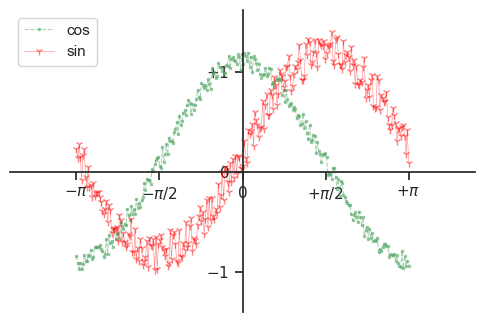

In [61]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2,alpha =0.5,label="cos")
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-",alpha =0.5,label="sin")

# 坐标轴范围
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

#有哪些坐标轴的刻度以及这些位置上会显示些什么
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$'])

#移动坐标轴
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend(loc='upper left')
plt.show()

有一些点是我们想让看图的人去特别注意的，这个时候我们需要把它们标注出来具体做法是**描点-连线-画箭头-添加符号**

(-4.39822971502571, 4.39822971502571)

(-1.4033410027096196, 1.615476676401783)

([<matplotlib.axis.XTick at 0x24e5ee96910>,
 [Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-1.5707963267948966, 0, '$-\\pi/2$'),
  Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$+\\pi/2$'),
  Text(3.141592653589793, 0, '$+\\pi$')])

([<matplotlib.axis.YTick at 0x24e5ee96d90>,
 [Text(0, -1, '$-1$'), Text(0, 0, '$0$'), Text(0, 1, '$+1$')])

Text(-90, -50, '$\\cos(\\frac{2\\pi}{3})=-\\frac{1}{2}$')

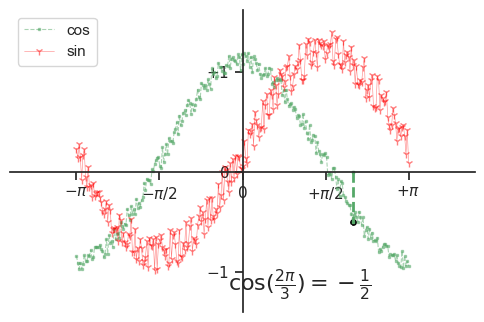

In [62]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2,alpha =0.5,label="cos")
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-",alpha =0.5,label="sin")

# 坐标轴范围
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

#有哪些坐标轴的刻度以及这些位置上会显示些什么
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$'])

#移动坐标轴
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# 标记特殊点
t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)], 'gs--', linewidth=2,markersize=2)#连线
plt.scatter([t,],[np.cos(t),], 15, color ='black')#描点


plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.1"))# 画箭头和添加符号

plt.legend(loc='upper left')
plt.show()

(-4.39822971502571, 4.39822971502571)

(-1.4033410027096196, 1.615476676401783)

([<matplotlib.axis.XTick at 0x24e5efa66a0>,
 [Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-1.5707963267948966, 0, '$-\\pi/2$'),
  Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$+\\pi/2$'),
  Text(3.141592653589793, 0, '$+\\pi$')])

([<matplotlib.axis.YTick at 0x24e5efafb50>,
 [Text(0, -1, '$-1$'), Text(0, 0, '$0$'), Text(0, 1, '$+1$')])

Text(-75, -40, '$\\cos(\\frac{2\\pi}{3})=-\\frac{1}{2}$')

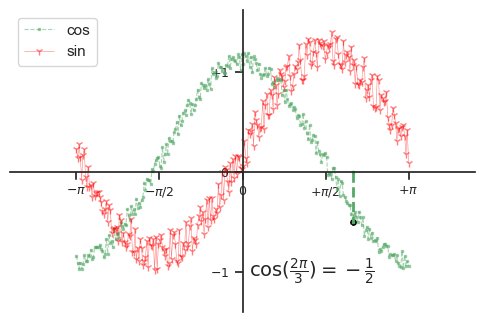

In [63]:
plt.plot(X,C, 'gs--', linewidth=0.8,markersize=2,alpha =0.5,label="cos")
plt.plot(X,S,color="red",marker="1", linewidth=0.4, linestyle="-",alpha =0.5,label="sin")

# 坐标轴范围
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)

#有哪些坐标轴的刻度以及这些位置上会显示些什么
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$'])

#移动坐标轴
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# 标记特殊点
t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)], 'gs--', linewidth=2,markersize=2)#连线
plt.scatter([t,],[np.cos(t),], 15, color ='black')#描点


plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-75, -40), textcoords='offset points', fontsize=14,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.1"))# 画箭头和添加符号

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(9)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.25 ))

plt.legend(loc='upper left')
plt.show()

matplotlib同时在它的网站上提供相当多的样例代码，并配了示例图，当你有了数据想要展示，就在里面翻一翻，看哪张图比较好看，把样例代码copy过来换成自己的数据就好。

https://matplotlib.org/gallery/index.html

下面着重介绍几份样例


(array([[0.00130985, 0.01964768, 0.09430888, 0.27375772, 0.35627799,
         0.34055985, 0.17420946, 0.04453475, 0.00392954, 0.00130985],
        [0.00261969, 0.02750676, 0.08775965, 0.26327896, 0.37592568,
         0.30912355, 0.1925473 , 0.0432249 , 0.00654923, 0.00130985],
        [0.00392954, 0.01309846, 0.09299903, 0.27637741, 0.37068629,
         0.31829247, 0.18468822, 0.04453475, 0.00523938, 0.        ]]),
 array([-3.60332649, -2.83987771, -2.07642893, -1.31298014, -0.54953136,
         0.21391742,  0.97736621,  1.74081499,  2.50426377,  3.26771256,
         4.03116134]),
 <a list of 3 BarContainer objects>)

Text(0.5, 1.0, 'bars with legend')

(array([[0.00043662, 0.00654923, 0.03143629, 0.09125257, 0.11875933,
         0.11351995, 0.05806982, 0.01484492, 0.00130985, 0.00043662],
        [0.00130985, 0.01571815, 0.06068951, 0.17901223, 0.24406789,
         0.21656113, 0.12225225, 0.02925322, 0.00349292, 0.00087323],
        [0.00261969, 0.0200843 , 0.09168919, 0.27113803, 0.36762999,
         0.32265862, 0.18381499, 0.04409813, 0.00523938, 0.00087323]]),
 array([-3.60332649, -2.83987771, -2.07642893, -1.31298014, -0.54953136,
         0.21391742,  0.97736621,  1.74081499,  2.50426377,  3.26771256,
         4.03116134]),
 <a list of 3 BarContainer objects>)

Text(0.5, 1.0, 'stacked bar')

(array([[  1.,  15.,  72., 209., 272., 260., 133.,  34.,   3.,   1.],
        [  3.,  36., 139., 410., 559., 496., 280.,  67.,   8.,   2.],
        [  6.,  46., 210., 621., 842., 739., 421., 101.,  12.,   2.]]),
 array([-3.60332649, -2.83987771, -2.07642893, -1.31298014, -0.54953136,
         0.21391742,  0.97736621,  1.74081499,  2.50426377,  3.26771256,
         4.03116134]),
 <a list of 3 List[Polygon] objects>)

Text(0.5, 1.0, 'stack step (unfilled)')

(array([[1.200e+01, 9.500e+01, 5.780e+02, 1.779e+03, 2.863e+03, 2.741e+03,
         1.409e+03, 4.290e+02, 8.600e+01, 8.000e+00],
        [1.200e+01, 6.500e+01, 2.890e+02, 8.050e+02, 1.477e+03, 1.355e+03,
         6.750e+02, 2.690e+02, 4.600e+01, 7.000e+00],
        [2.000e+00, 2.600e+01, 1.170e+02, 3.100e+02, 5.660e+02, 5.460e+02,
         3.080e+02, 9.900e+01, 2.400e+01, 2.000e+00]]),
 array([-3.76782474, -3.00246763, -2.23711052, -1.47175342, -0.70639631,
         0.0589608 ,  0.8243179 ,  1.58967501,  2.35503212,  3.12038922,
         3.88574633]),
 <a list of 3 BarContainer objects>)

Text(0.5, 1.0, 'different sample sizes')

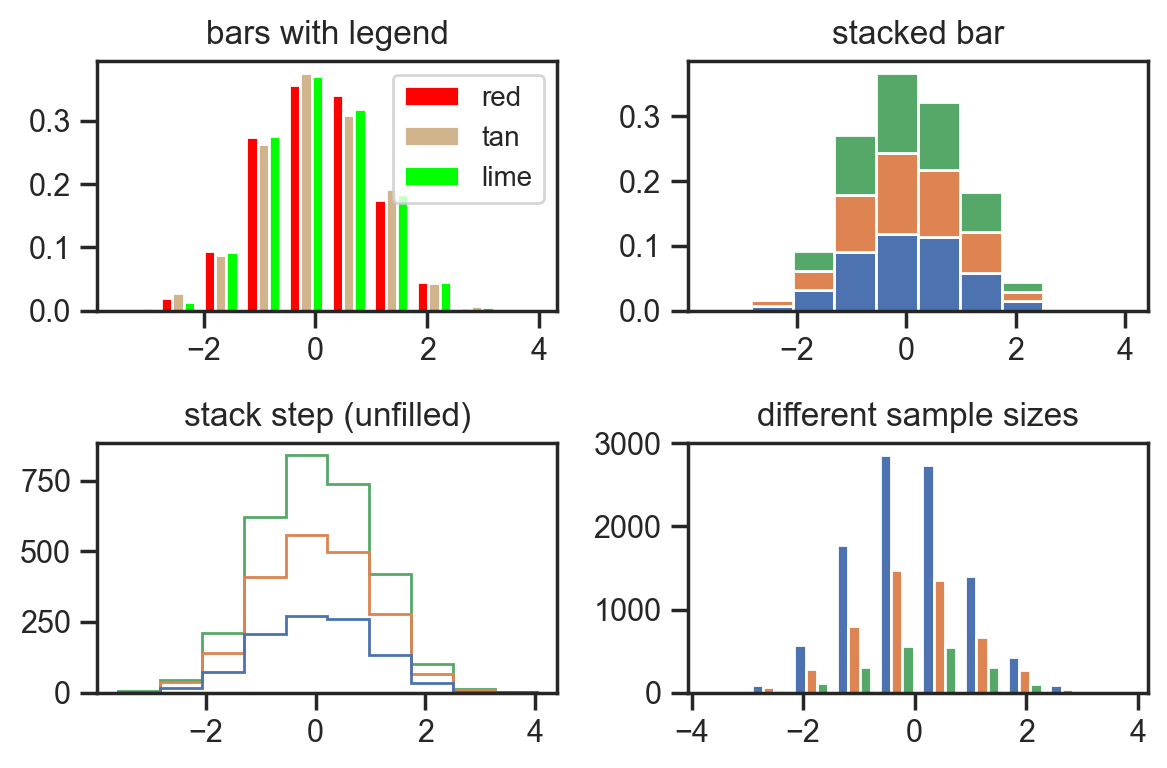

In [64]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

plt.rcParams['figure.dpi'] = 200 #分辨率
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()


具有多个数据集的直方图（hist）函数

用多个样本集绘制直方图并演示：

- 对多个样本集使用图例
- 堆积条形图
- 无填充台阶曲线
- 不同样本大小的数据集

选择不同的箱数和大小可以显著影响直方图的形状。

<BarContainer object of 15 artists>

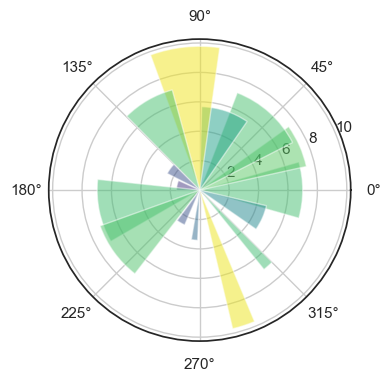

In [65]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100 #分辨率
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 15
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)# 半径
width = np.pi / 4 * np.random.rand(N)# 宽度
colors = plt.cm.viridis(radii / 10.)# 颜色

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

极坐标轴上的条形图

(array([ 0.,  0.,  2.,  0.,  2.,  1.,  3.,  7.,  5., 14., 19., 33., 51.,
        61., 96., 88., 98., 96., 80., 89., 75., 65., 38., 33., 21., 14.,
         3.,  3.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([-4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
        -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
         2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25]),
 <BarContainer object of 34 artists>)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  6., 10., 16., 26., 50., 46.,
        71., 95., 95., 88., 81., 88., 94., 66., 52., 43., 38., 18.,  7.,
         4.,  1.,  2.,  1.,  0.,  0.,  0.,  0.]),
 array([-4.25, -4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25,
        -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
         2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25]),
 <BarContainer object of 34 artists>)

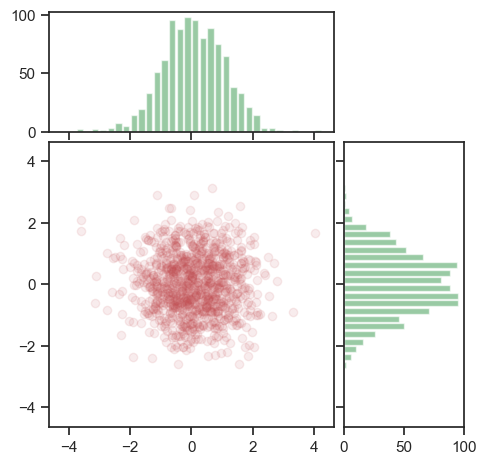

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, ax = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
ax.scatter(x, y,marker = 'o',alpha = 0.1,color = "r")
# help(ax.scatter)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins,alpha = 0.6,color = "g",rwidth = 0.8)
ax_histy.hist(y, bins=bins, orientation='horizontal',alpha = 0.6,color = "g",rwidth = 0.8)
# help(ax_histy.hist)

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, 50, 100])
ax_histy.set_xticks([0, 50, 100])

plt.show()

散点直方图（可定位轴）

在图的侧面以直方图的形式显示散点的边缘分布。

为了使主轴与边缘对齐，轴的位置由分隔器定义，分隔器通过make_axes_locatable生成。

生成类似图形的方法显示在带有直方图的散点图示例中。可定位轴方法的优点是边缘轴遵循主轴的固定纵横比。

Text(0.5, 1.0, 'Rectangular box plot')

Text(0.5, 1.0, 'Notched box plot')

Text(0.5, 0, 'Three separate samples')

Text(0, 0.5, 'Observed values')

Text(0.5, 0, 'Three separate samples')

Text(0, 0.5, 'Observed values')

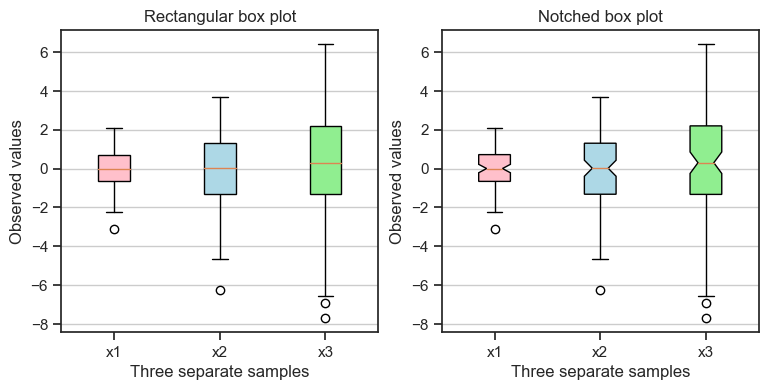

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

具有自定义填充颜色的方框图


此图说明如何创建两种类型的长方体图（矩形和凹口），以及如何通过访问长方体图的艺术家的属性来使用自定义颜色填充它们。此外，labels参数用于为每个示例提供x-tick标签。


有关箱线图及其历史的一般参考资料，请参见：http://vita.had.co.nz/papers/boxplots.pdf

"盒式图"或叫"盒须图""箱形图"boxplot（也称箱须图(Box-whiskerPlot）须图又称为箱形图，其绘制须使用常用的统计量，能提供有关数据位置和分散情况的关键信息，尤其在比较不同的母体数据时更可表现其差异。

如图所示，标示了图中每条线表示的含义，其中应用到了分位值（数）的概念。

主要包含六个数据节点，将一组数据从大到小排列，分别计算出他的上边缘，上四分位数Q3，中位数，下四分位数Q1，下边缘，还有异常值。

**seaborn**

seaborn是一个统计数据可视化工具。

Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。同时它能高度兼容numpy与pandas数据结构以及scipy与statsmodels等统计模式。

所以说我们用它的目的很单纯，为了画出更好看的图。


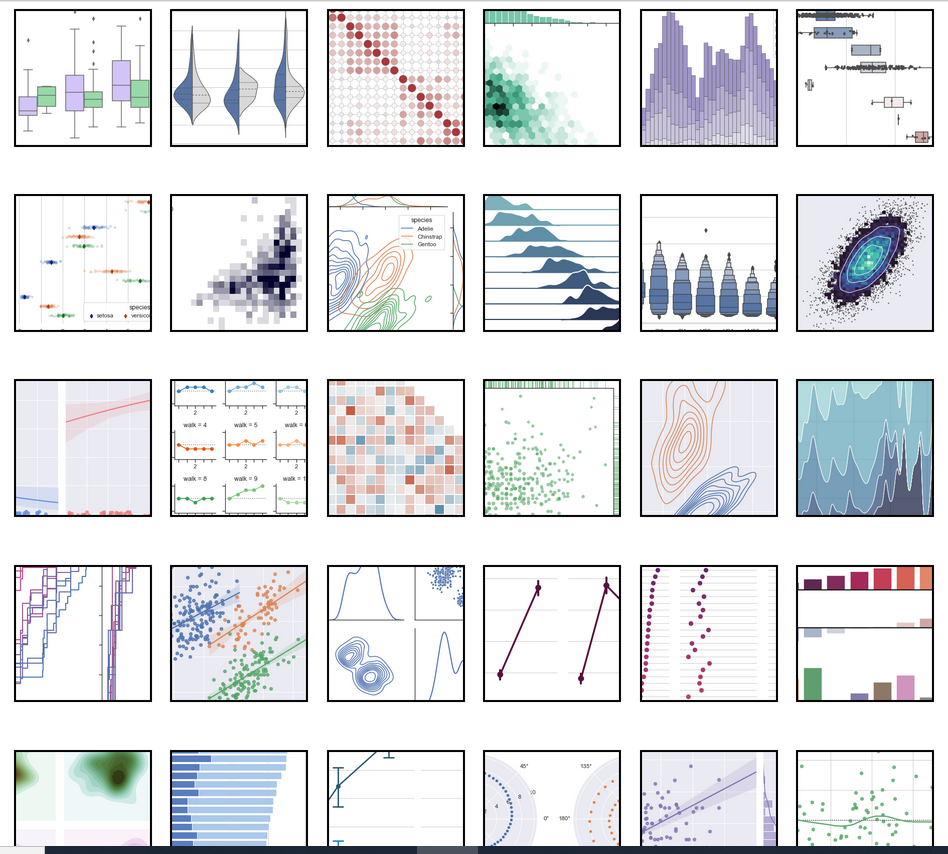

整体上，seaborn要比原生matplotlib好看的多，但是也更难理解和画好。下面举几个例子

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


<AxesSubplot:xlabel='carat', ylabel='price'>

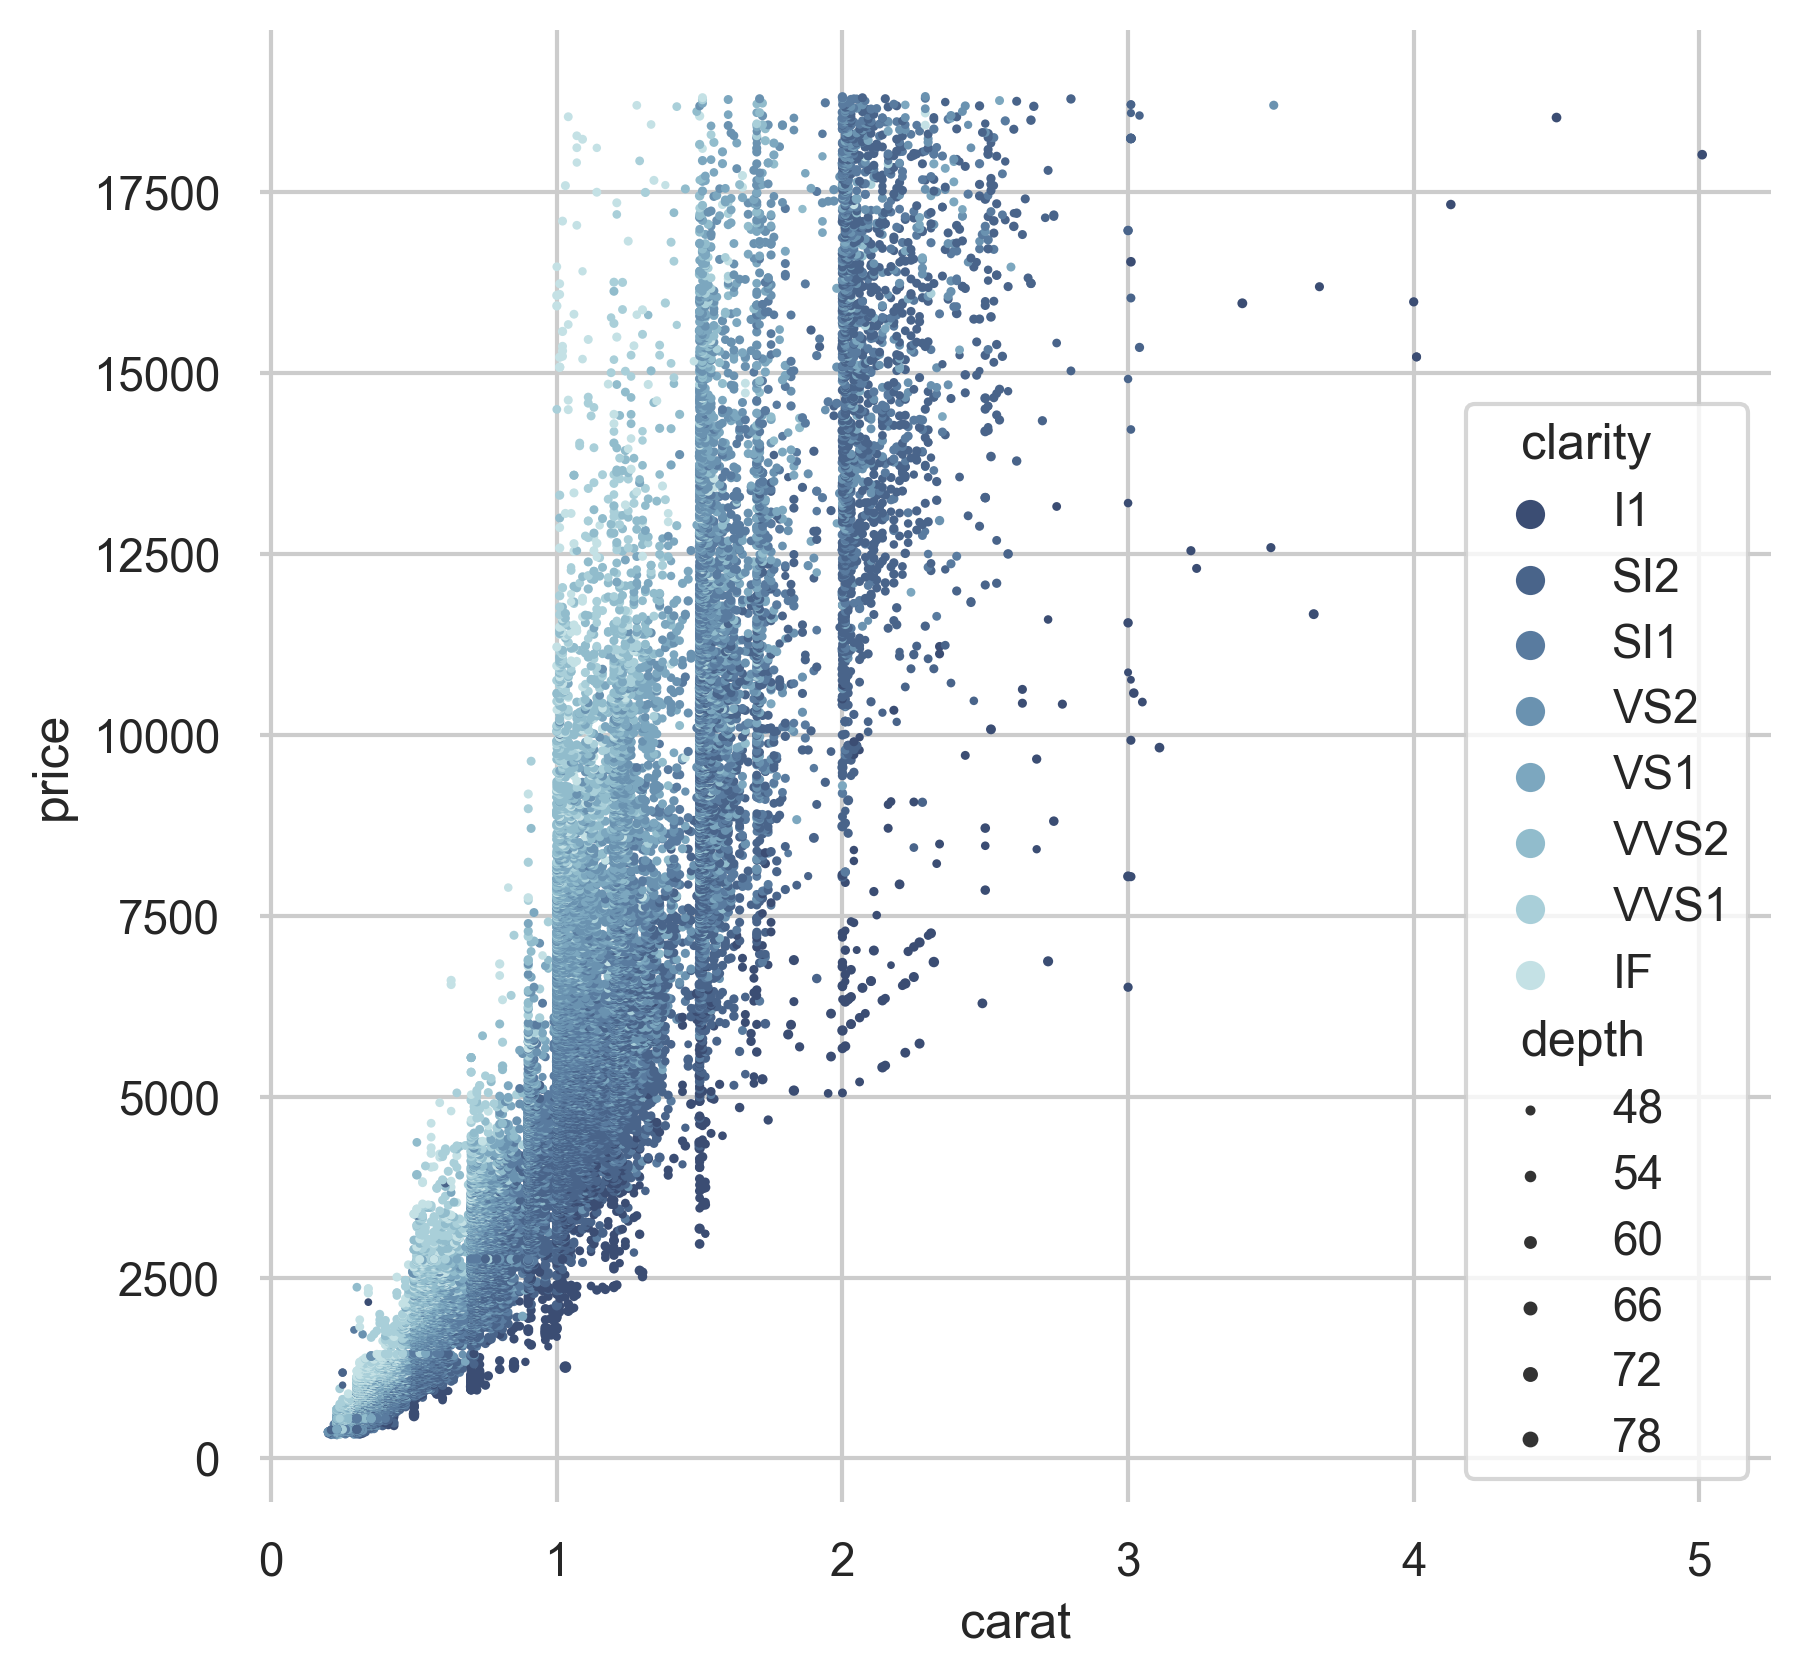

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint 
sns.set_theme(style="whitegrid")

plt.rcParams['figure.dpi'] = 300 #分辨率

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")
pprint(diamonds)
# help(sns.load_dataset)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

这个经典的数据集包含近54,000颗钻石的价格和其他属性。对于初学者来说，这是一个很好的数据集，可以学习如何进行数据分析和可视化。

- 价格美元价格（\$ 326 -  18,823）

- 钻石的克拉重量（0.2–5.01）

- 切割的切割质量（一般，良好，非常好，特级，理想）

- 颜色钻石颜色，从J（最差）到D（最佳）

- 净度钻石净度的度量（I1（最差），SI2，SI1，VS2，VS1，VVS2，VVS1，IF（最佳））

- x长度（mm）（0–10.74）

- y宽度，单位：mm（0–58.9）

- z深度（mm）（0–31.8）

- 深度总深度百分比= z /平均值（x，y）= 2 * z /（x + y）（43–79）

- 钻石顶部相对于最宽点的表格宽度（43–95）

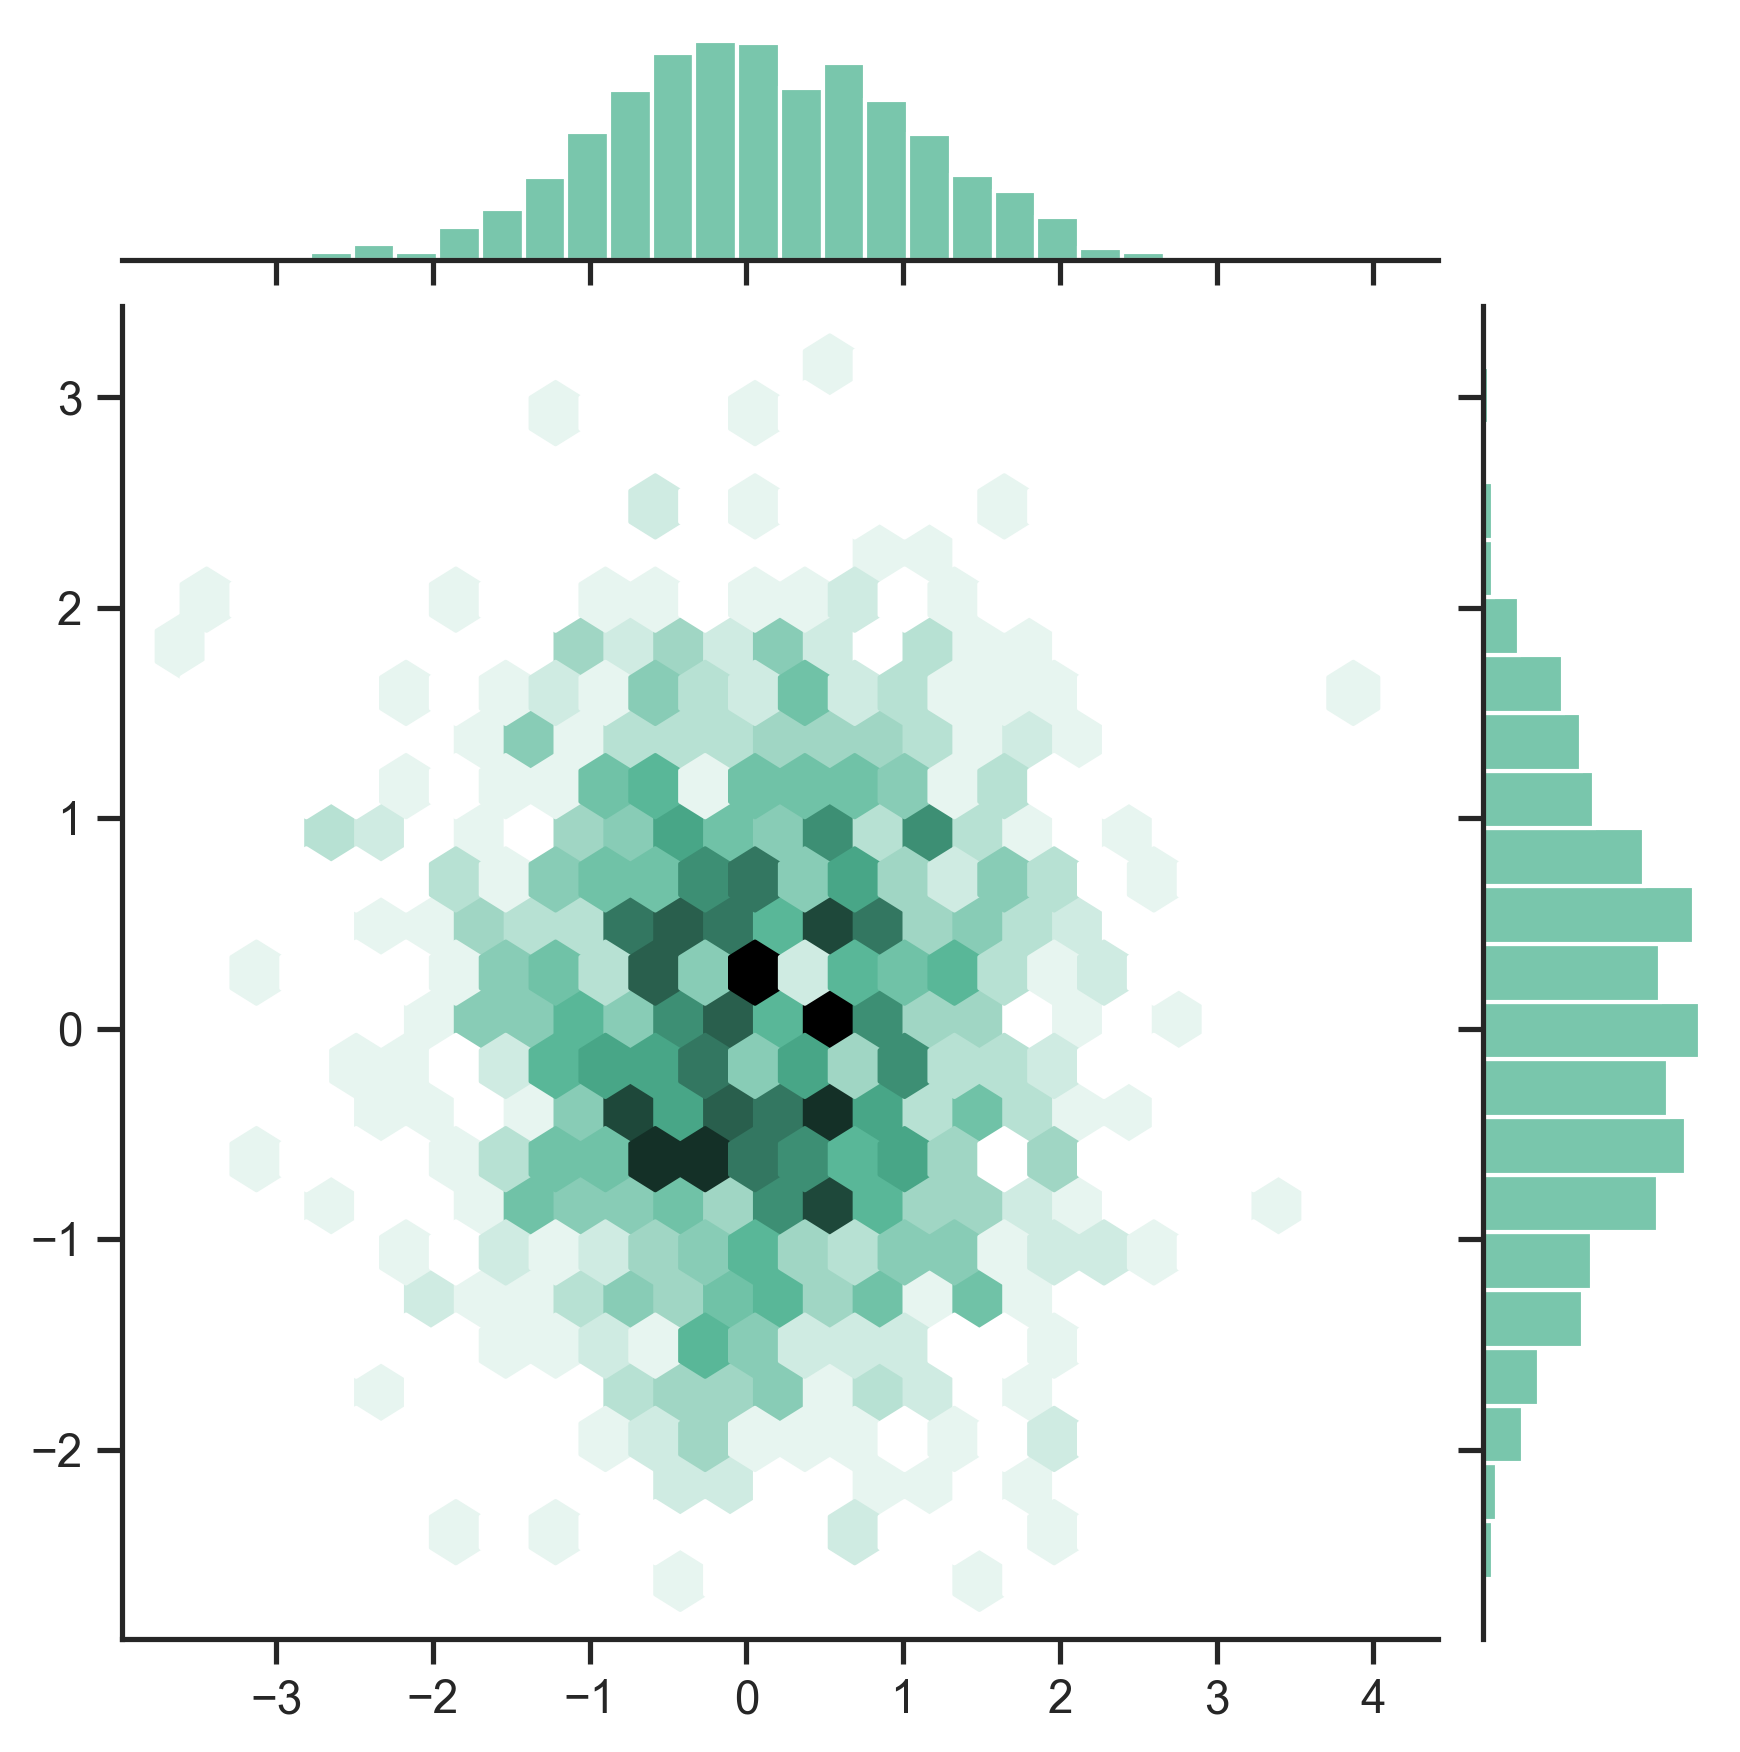

In [69]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")